### let's understand PCA and TSNE technique with MNIST dataset

Data Source: https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [51]:
import os
import struct
import numpy as np
import matplotlib.image as  img
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observation : 

         We found 5 rows and 785 column so we can say that we have 785 dimensional data set

In [52]:
# save the labels to a Pandas series target
l = data['label']
l.shape

(42000,)

In [53]:
# drop the label
d = data.drop('label',axis=1)
d.shape

(42000, 784)

Observation:


       We found 42000 rows and 784 column

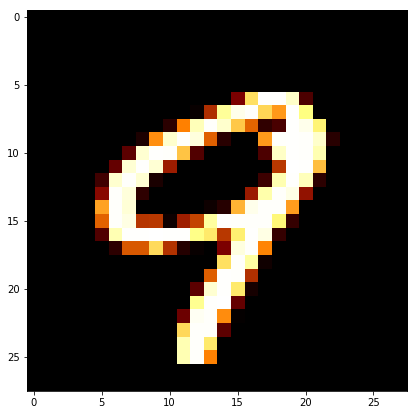

In [54]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
plt.show()

In [55]:
labels = l.head(15000)
data = d.head(15000)

In [56]:
print("the shape of sample data:",data.shape)

the shape of sample data: (15000, 784)


In [57]:
#Data Preprocessing : Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

print(standardized_data.shape)



(15000, 784)


In [58]:
# find co-variance matrix which is A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)
print("Shape of variance matrix",covar_matrix.shape)

Shape of variance matrix (784, 784)


In [59]:
# finding  top 2 eigen values and correspoding eigen vector
from scipy.linalg import eigh

# eigh funtion will return eigen values in ascending order
# this code generate only top 2 eigen values
values,vectors = eigh(covar_matrix,eigvals=(782,783))

print("Shape of eigen vector:",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vector:",vectors.shape)

# Here the vectors[1] represent eigen vector corresponding 1st principal eigen vector

#Here the vectors[0] represent eigen vector corresponding to 2nd principal eigen vector


Shape of eigen vector: (784, 2)
Updated shape of eigen vector: (2, 784)


In [60]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultant new data points' shape ", vectors.shape, "*", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) * (784, 15000)  =  (2, 15000)


In [62]:
# appending label to 2D projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

# creating a new dataframe for plotting the labaled point

dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


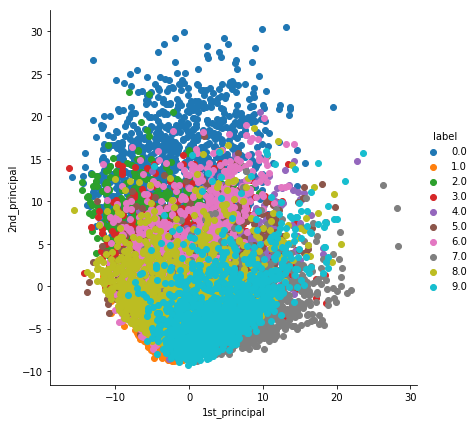

In [63]:
# plotting 2D data point with seaborn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

### Implementation of PCA using Sklearn

In [64]:
from sklearn import decomposition
pca = decomposition.PCA()


In [65]:
# configuring the parameters
#number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data) # Fit the model with Sample_data and apply reduction on sample_data

# pca_reduced will contain 2D projects of sample data

print("Shape of pca_reduced.shape",pca_data.shape)

Shape of pca_reduced.shape (15000, 2)


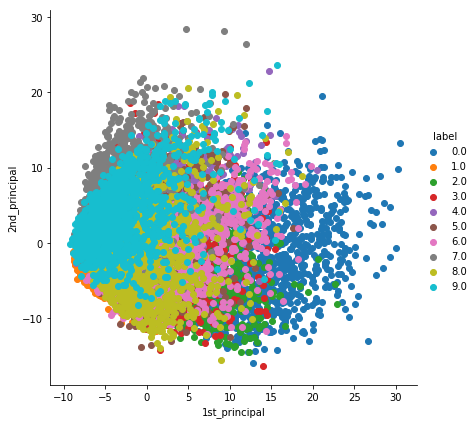

In [69]:
#attaching the label for each 2 D data point
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label",size = 6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

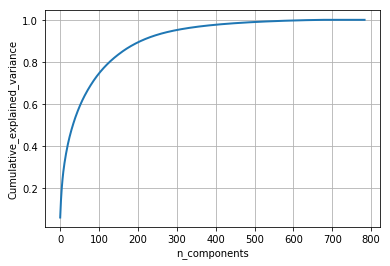

In [72]:
# PCA for Dimensionality Reduction (Not Visiualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

#explained_variance : amount of variance explained by each of selected components
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#plot the PCA spectrum

plt.figure(1,figsize = (6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("Cumulative_explained_variance")
plt.show()

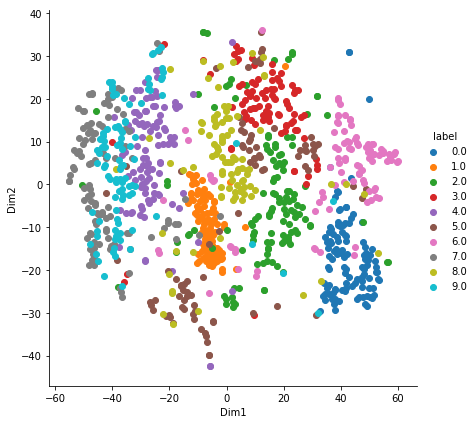

In [73]:
from sklearn.manifold import TSNE

# picking 1000 points as TSNE takes lot of time for 15k points

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components = 2,random_state = 0)

tsne_data = model.fit_transform(data_1000)

# creating a new dataframe which helps us in plotting the result data

tsne_data = np.vstack((tsne_data.T,labels_1000)).T

tsne_df = pd.DataFrame(data=tsne_data,columns=['Dim1','Dim2','label'])

#plotting the result of tsne

sns.FacetGrid(tsne_df,hue = 'label',size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()



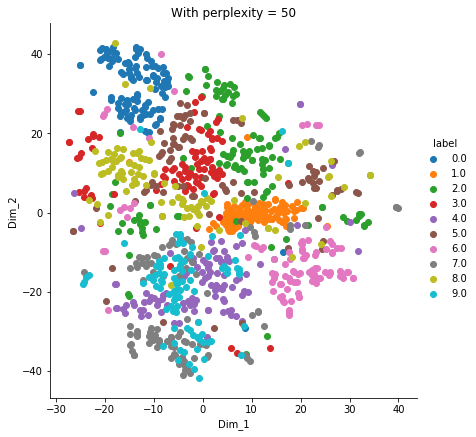

In [76]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

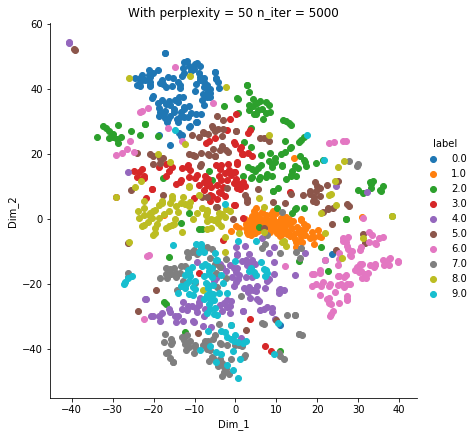

In [78]:
model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50 n_iter = 5000')
plt.show()

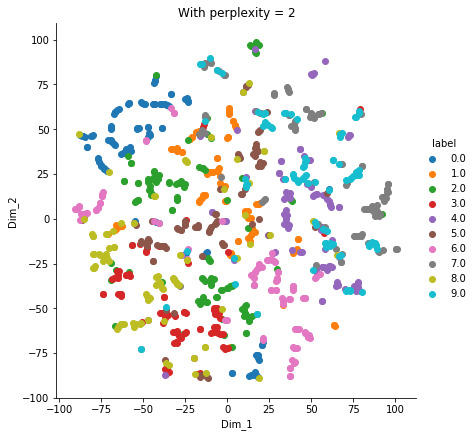

In [79]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

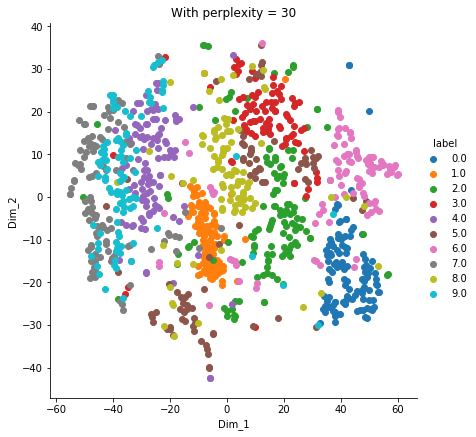

In [80]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30')
plt.show()